# K Nearest Neighbors 
Dataset - Iris Dataset

Goal - To classify iris flowers specifies and to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris.

1. we have measurements for which we know the correct species of iris, this is a supervised learning problem. In this problem, we want to predict one of several options (the species of iris). This is an example of a classification problem.
2. Every iris in the dataset belongs to one of three classes (setosa, versicolor, or virginica), so this problem is a three-class classification problem.The desired output for a single data point (an iris) is the species of this flower.
3. For a particular data point, the species it belongs to is called its label.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [49]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
type(iris_dataset)

sklearn.utils.Bunch

The iris object that is returned by load_iris is a Bunch object, which is very similar
to a dictionary. It contains keys and values

In [50]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [51]:
print(iris_dataset['DESCR'][:2000] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
iris_dataset['data'][:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [53]:
# The data itself is contained in the target and data fields. data contains the numeric measurements of sepal length, sepal width, petal length, and petal width in a NumPy array:
type(iris_dataset['data'])

numpy.ndarray

In [54]:
##The value of the key target_names is an array of strings, containing the species of flower that we want to predict
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
## The value of feature_names is a list of strings, giving the description of each feature
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [56]:
## Rows --> individual items are Samples
## Columns --> properties of items Features
## Shape --> Measurement which is number of samples X features
iris_dataset['data'].shape

(150, 4)

In [57]:
iris_dataset['target'].shape

(150,)

Hence for every item/sample, one target which describes the row-one entry per flower

In [59]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0 - sertosa
1 - versicolor
2 - virginica

In [60]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Model Building and Evaluation

In [61]:
# To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [62]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [63]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


# Data Visualisation

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

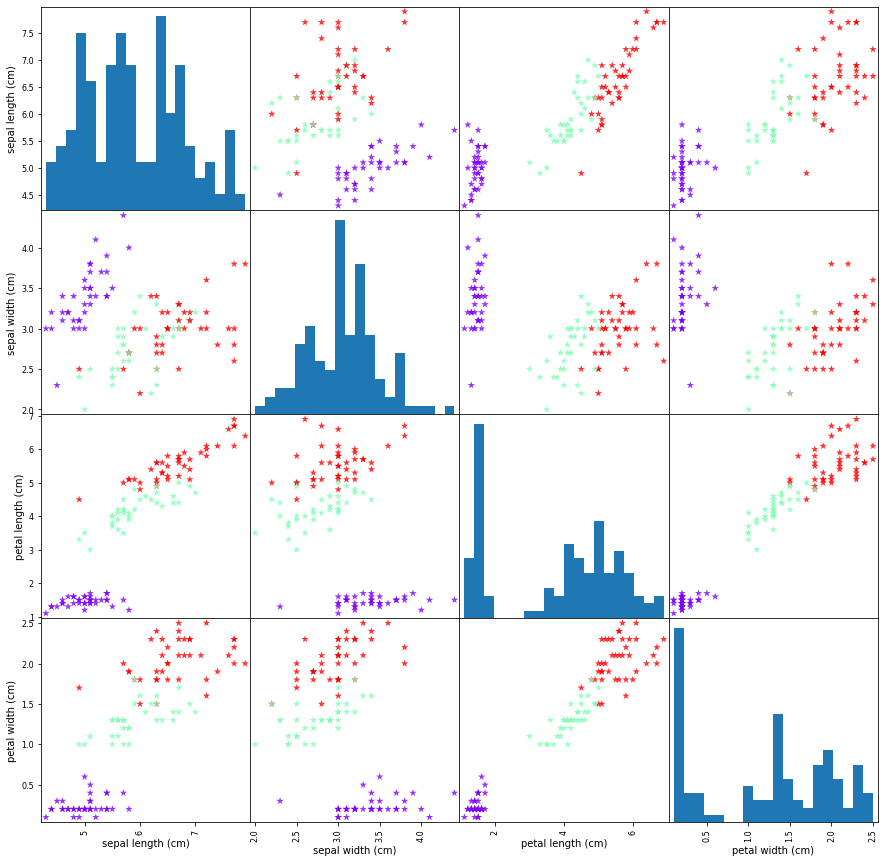

In [66]:
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),marker='*', hist_kwds={'bins': 20}, s=60,
alpha=.8, cmap='rainbow')

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)   #instantiate an object

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

## Prediction

Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be

In [81]:
X_predict= np.array([[5, 2.9, 1.0, 0.2]])
X_predict

array([[5. , 2.9, 1. , 0.2]])

In [82]:
prediction = knn.predict(X_predict)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(
iris_dataset['target_names'][prediction]))

Prediction: [0]
Predicted target name: ['setosa']


# Evaluating the Model

make a prediction for each iris in the test data and compare it
against its label (the known species). We can measure how well the model works by
computing the accuracy, which is the fraction of flowers for which the right species
was predicted

In [83]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [84]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [85]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


For this model, the test set accuracy is about 0.97, which means we made the right
prediction for 97% of the irises in the test set. Under some mathematical assumptions,
this means that we can expect our model to be correct 97% of the time for new
irises